# Predicting the March Madness Bracket Project
## Data Preprocessing
### By: Joe Opitz (CSCI 447 - Project)

read csv files
Be able to create training examples - read in file names from other files based on analytics of other teams
Print out whether they won or lost 

#### Import all possible datasets

In [1]:
import pandas as pd
ratings = pd.read_csv('data/538 ratings.csv')
bart_away = pd.read_csv('data/Barttorvik Away.csv')
bart_AN = pd.read_csv('data/Barttorvik Away-Neutral.csv')
bart_home = pd.read_csv('data/Barttorvik Home.csv')
bart_neut = pd.read_csv('data/Barttorvik Neutral.csv')
coach = pd.read_csv('data/Coach Results.csv')
conf_res = pd.read_csv('data/Conference Results.csv')
conf_stat = pd.read_csv('data/Conference Stats.csv')
heat_check = pd.read_csv('data/Heat Check Tournament Index.csv')
KenBart = pd.read_csv('data/KenPom Barttorvik.csv')
pre_votes = pd.read_csv('data/Preseason Votes.csv')
pub_picks = pd.read_csv('data/Public Picks.csv')
resume = pd.read_csv('data/Resumes.csv')
seed = pd.read_csv('data/Seed Results.csv')
shoot_split = pd.read_csv('data/Shooting Splits.csv')
team_res = pd.read_csv('data/Team Results.csv')
tourn_locations = pd.read_csv('data/Tournament Locations.csv')
tourn_matchups = pd.read_csv('data/Tournament Matchups.csv')
upset_count = pd.read_csv('data/Upset Count.csv')
upset_seed_info = pd.read_csv('data/Upset Seed Info.csv')

#### Function to remove the temporary values for the year that you are trying to predict

In [2]:
def DropYear(df,year):
    return df[df['YEAR'] != year]

#### Function to allow for ease of access to data for the year you are trying to predict

In [3]:
# Will be used to grab data from the year you are trying to predict
def GrabSpecificYear(df,year):
    return df[df['YEAR'] == year]

#### Function to merge specific datasets together easily

In [4]:
# Keys represents what column you would like to merge the dataframes on
# dfs is an array of dataframes that you will use to create an inputs dataframe
# Exclude the year that you are making the model for
def MergeInputs(df1, df2, keys):
    df = pd.merge(df1,df2,on=keys, how='left')
    return df
    

#### Function to sample down the size of my datasets, to grab specific features

In [5]:
def SelectFeatures(df, features, excludedYear):
    # Select the specified features from the DataFrame
    # Could use df[features] directly, but this handles cases where some features might not exist in the DataFrame
    temp_df = df[[feature for feature in features if feature in df.columns]]
    
    # Return all years minus the year the model is being made for
    return temp_df[df['YEAR'] != excludedYear]

#### Select a few manageable features and merge inputs into one data frame

In [6]:
# Temporary scaled down features
features = ['YEAR','TEAM NO', 'TEAM', 'EXP', 'FT%', 'ELITE SOS', 'KADJ T', 'KADJ O', 'KADJ D', 'KADJ EM', 'PPPD', 'PPPO', 
            'AST%', 'WIN%', 'TOV%', '3PT%D', 'EFG%', 'EFG%D', 'TOV%D', '3PT%', 'BARTHAG', 'ELO', 'Q1 W', 'RESUME', 'EFF HGT',
           'TALENT', 'NET RPI']

# How dataframes should be be merged together
key = ['YEAR','TEAM NO', 'TEAM']

# Grab features from both datasets and merge them together into a datafrane
ken_df = SelectFeatures(KenBart, features, 2024)
resume_df = SelectFeatures(resume, features, 2024)
inputs_df = MergeInputs(ken_df, resume_df, key)
#inputs_df.to_csv('inputs.csv')
inputs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1011 entries, 0 to 1010
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YEAR       1011 non-null   int64  
 1   TEAM NO    1011 non-null   int64  
 2   TEAM       1011 non-null   object 
 3   EXP        1011 non-null   float64
 4   FT%        1011 non-null   float64
 5   ELITE SOS  1011 non-null   float64
 6   KADJ T     1011 non-null   float64
 7   KADJ O     1011 non-null   float64
 8   KADJ D     1011 non-null   float64
 9   KADJ EM    1011 non-null   float64
 10  PPPD       1011 non-null   float64
 11  PPPO       1011 non-null   float64
 12  AST%       1011 non-null   float64
 13  WIN%       1011 non-null   float64
 14  TOV%       1011 non-null   float64
 15  3PT%D      1011 non-null   float64
 16  EFG%       1011 non-null   float64
 17  EFG%D      1011 non-null   float64
 18  TOV%D      1011 non-null   float64
 19  3PT%       1011 non-null   float64
 20  BARTHAG 

#### Function to combine input dataset with predictor dataset

In [8]:
def combine(df1, df2, key):
    predictor_df = DropYear(df1, 2024)
    df = pd.merge(predictor_df, df2, on=key, how='left', suffixes=('','_dup'))
    df = df[df.columns.drop(list(df.filter(regex='_dup')))]
    return df
df = combine(tourn_matchups, inputs_df, ['YEAR', 'TEAM'])
#df.to_csv('predictors.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888 entries, 0 to 1887
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YEAR           1888 non-null   int64  
 1   BY YEAR NO     1888 non-null   int64  
 2   BY ROUND NO    1888 non-null   float64
 3   TEAM NO        1888 non-null   int64  
 4   TEAM           1888 non-null   object 
 5   SEED           1888 non-null   int64  
 6   ROUND          1888 non-null   int64  
 7   CURRENT ROUND  1888 non-null   int64  
 8   SCORE          1888 non-null   float64
 9   EXP            1888 non-null   float64
 10  FT%            1888 non-null   float64
 11  ELITE SOS      1888 non-null   float64
 12  KADJ T         1888 non-null   float64
 13  KADJ O         1888 non-null   float64
 14  KADJ D         1888 non-null   float64
 15  KADJ EM        1888 non-null   float64
 16  PPPD           1888 non-null   float64
 17  PPPO           1888 non-null   float64
 18  AST%    

# Merge dataframes together based on inputs. Once inputs are together in a big data frame, begin to make a training set consisting of two different teams playing together, which will lead to who won as my output.

### Now that Texas and Virginia are figured out, it is time to start visualization. Will start off by looking at specific attributes. Once complete, view correlations and anything else that may be useful.

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

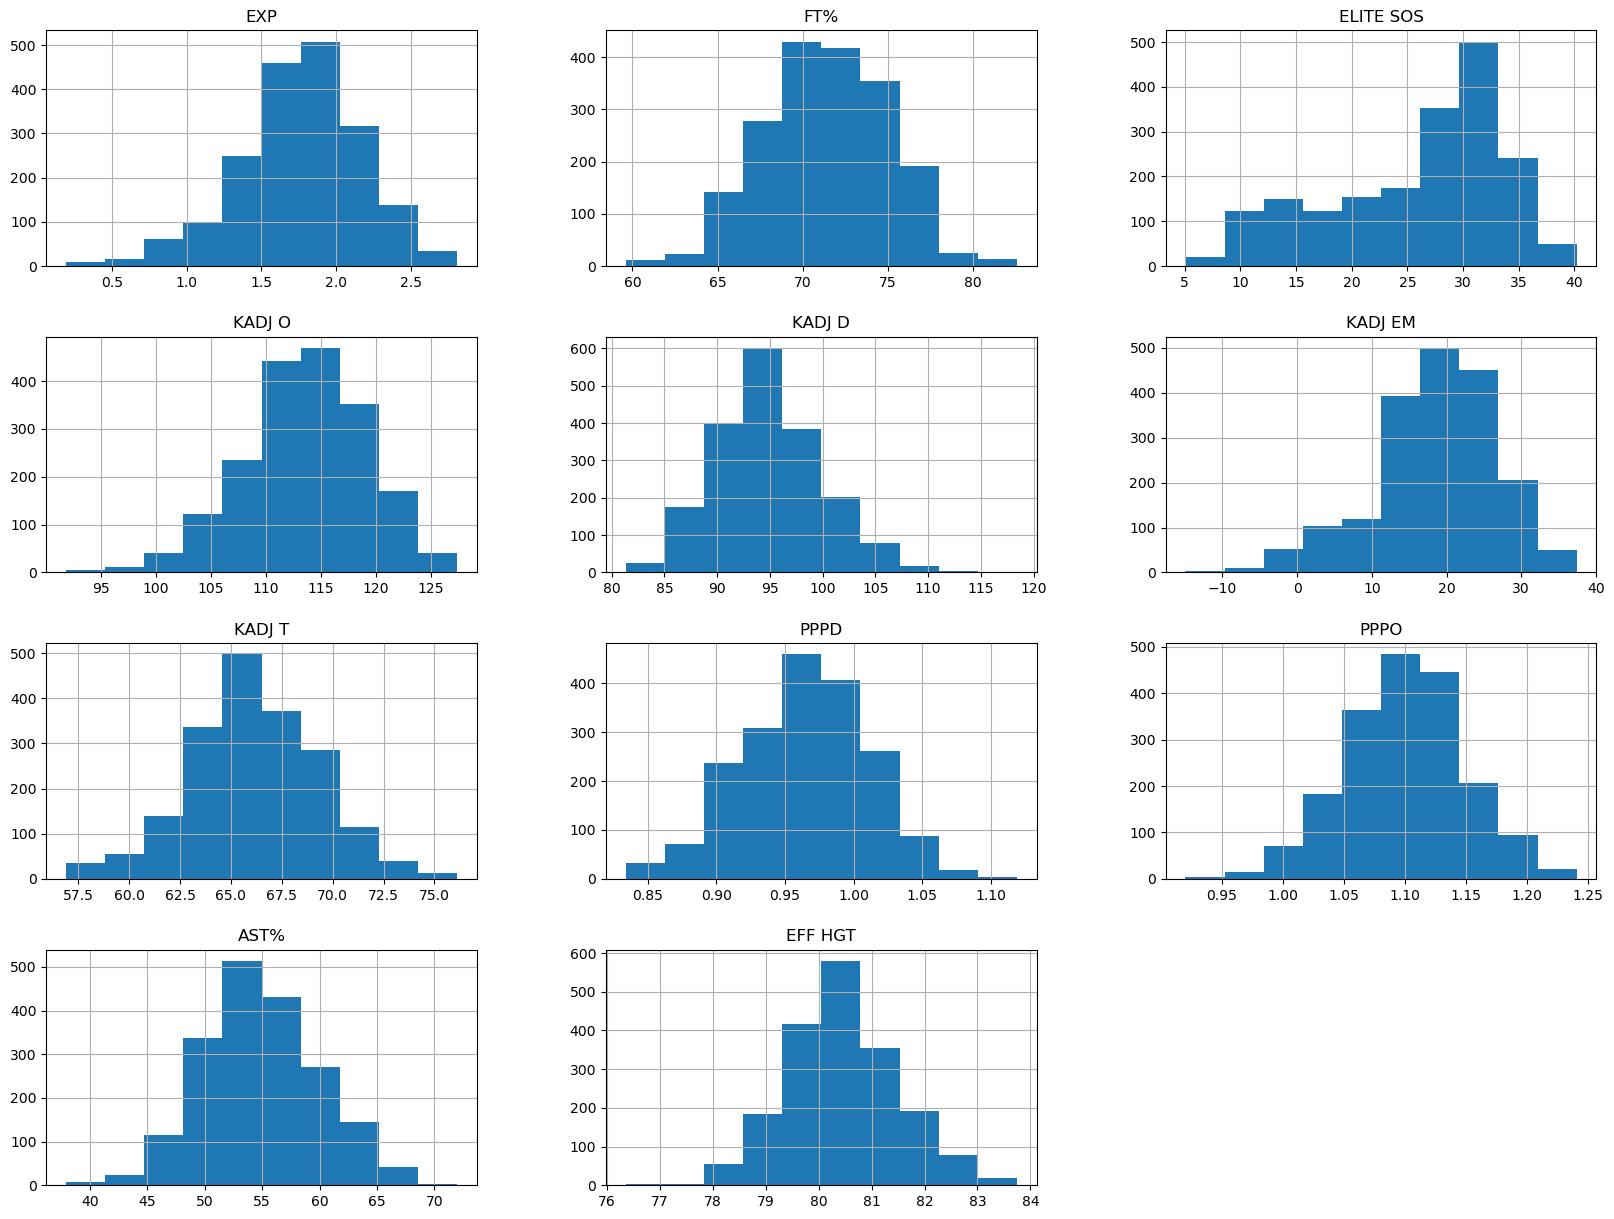

In [9]:
temp_columns = ['EXP', 'FT%', 'ELITE SOS', 'KADJ O', 'KADJ D', 'KADJ EM','KADJ T', 'PPPD', 'PPPO', 'AST%', 'EFF HGT']
temp_df = df[temp_columns]
temp_df.hist(figsize=(20,15))
plt.show()

### A lot of these features seem to be pretty close to a bell curve. 
#### The average experience per team seems to be about 2 years, with more teams having less than that then more (something to think about), could be fairly important in predicting deep runs in the tournament. 
#### Very few teams have over 75% for Free Throws. 
#### SOS seems to be fairly skewed, which I am guessing is caused by the mid majors more then anything. 
#### Curious if the drop off after 120 means anything for adjusted offensive efficiency. 
#### Also curious about the drop off after around 102.5 for adjusted defensive efficiency. 
#### KADJ EM stands for Adjusted Efficiency Margin, which takes ADJ O minus ADJ D, which helps determine how much a given team would outscore the average DIvision 1 program by; I believe this feature will be a good general predictor of games, although during dimensionality reduction, there is a good chance it may get merged with other features. 
#### Points Per Possesion on Defense (PPPD) will be a fairly interesting feature to look, does defense truely win championships? 
#### On the other side, Points Per Possession on Offense will be a good way to look at offensive importance during the tournament. #### Would not be surprised if both of these are strongly correlated with KenPoms adjusted efficiencies. 
#### Assist percentage will be an interesting feature as well, does team ball play better in the tournament then hero ball?
#### Curious if a fast paced team is meant to perform better then a slow paced team.

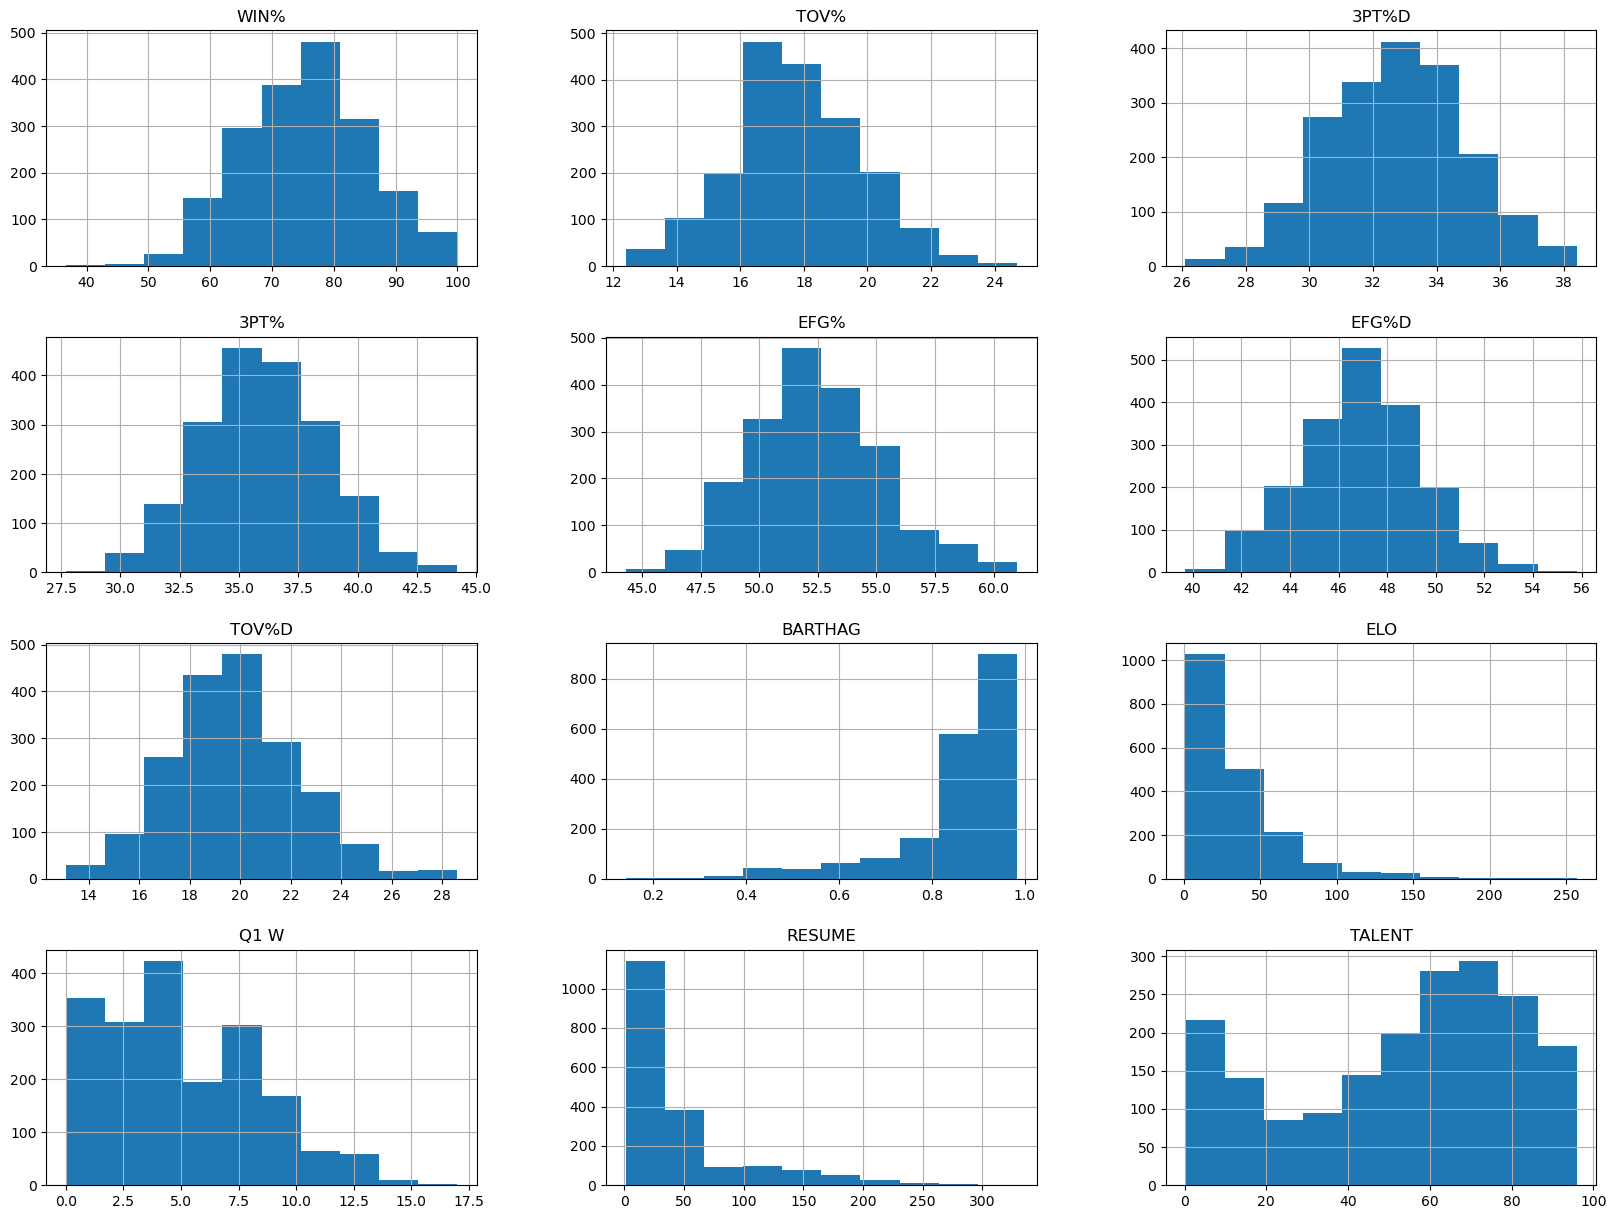

In [10]:
temp = ['WIN%', 'TOV%', '3PT%D', '3PT%', 'EFG%', 'EFG%D', 'TOV%D', 'BARTHAG', 'ELO', 'Q1 W', 'RESUME', 'TALENT']
temp_df2 = df[temp]
temp_df2.hist(figsize=(20,15))
plt.show()

### These data points seem to be a lot more skewed than normal
#### Win% should be an obvious feature to include, as this shows how the team performed all year long, it's more in there to weed out the teams who are just there to be there.
#### TOV% will be an interesting one to look at, turning the ball over is never good. But how much does it truely matter?
#### 3PT%D is a good feature to look at, since in March, being a good 3 point team can be very useful, but how does being an efficient team at guarding the 3 effect it?
#### So, on the other hand, how does being a good team at shooting the 3 impact success in the tournament, is there any correlation?
#### Effective field goal percentage for both offense and defense, will most likely have a strong correlation with adjusted kenpom efficiency, but for now interesting topics to look at regarding how good of an offensive and defensive team they are. 
#### TOV%D indicates how good a team is at forcing turnovers, could be a bit of a shock to teams they are playing. So, could be very important.
#### BARTHAG is a projected win percentage against an average team on a neutral court, so pretty much what march madness is, so combining that with all of the other features could be beneficial.
#### ELO is a way of calculating how good a team is, guessing based on the fact that there is a lot of features, it indicates that there is a lot of historical success in the tournament the lower a teams ELO is.
#### Quad 1 wins indicate how battle tested a given team is, which can be important in March Madness.

C:\Users\josep\AppData\Local\Temp\ipykernel_13964\3561130973.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ROUND'] = data['ROUND'].replace({64:'Not Final 4', 32 : 'Not Final 4', 16 : 'Not Final 4', 8 : 'Not Final 4',


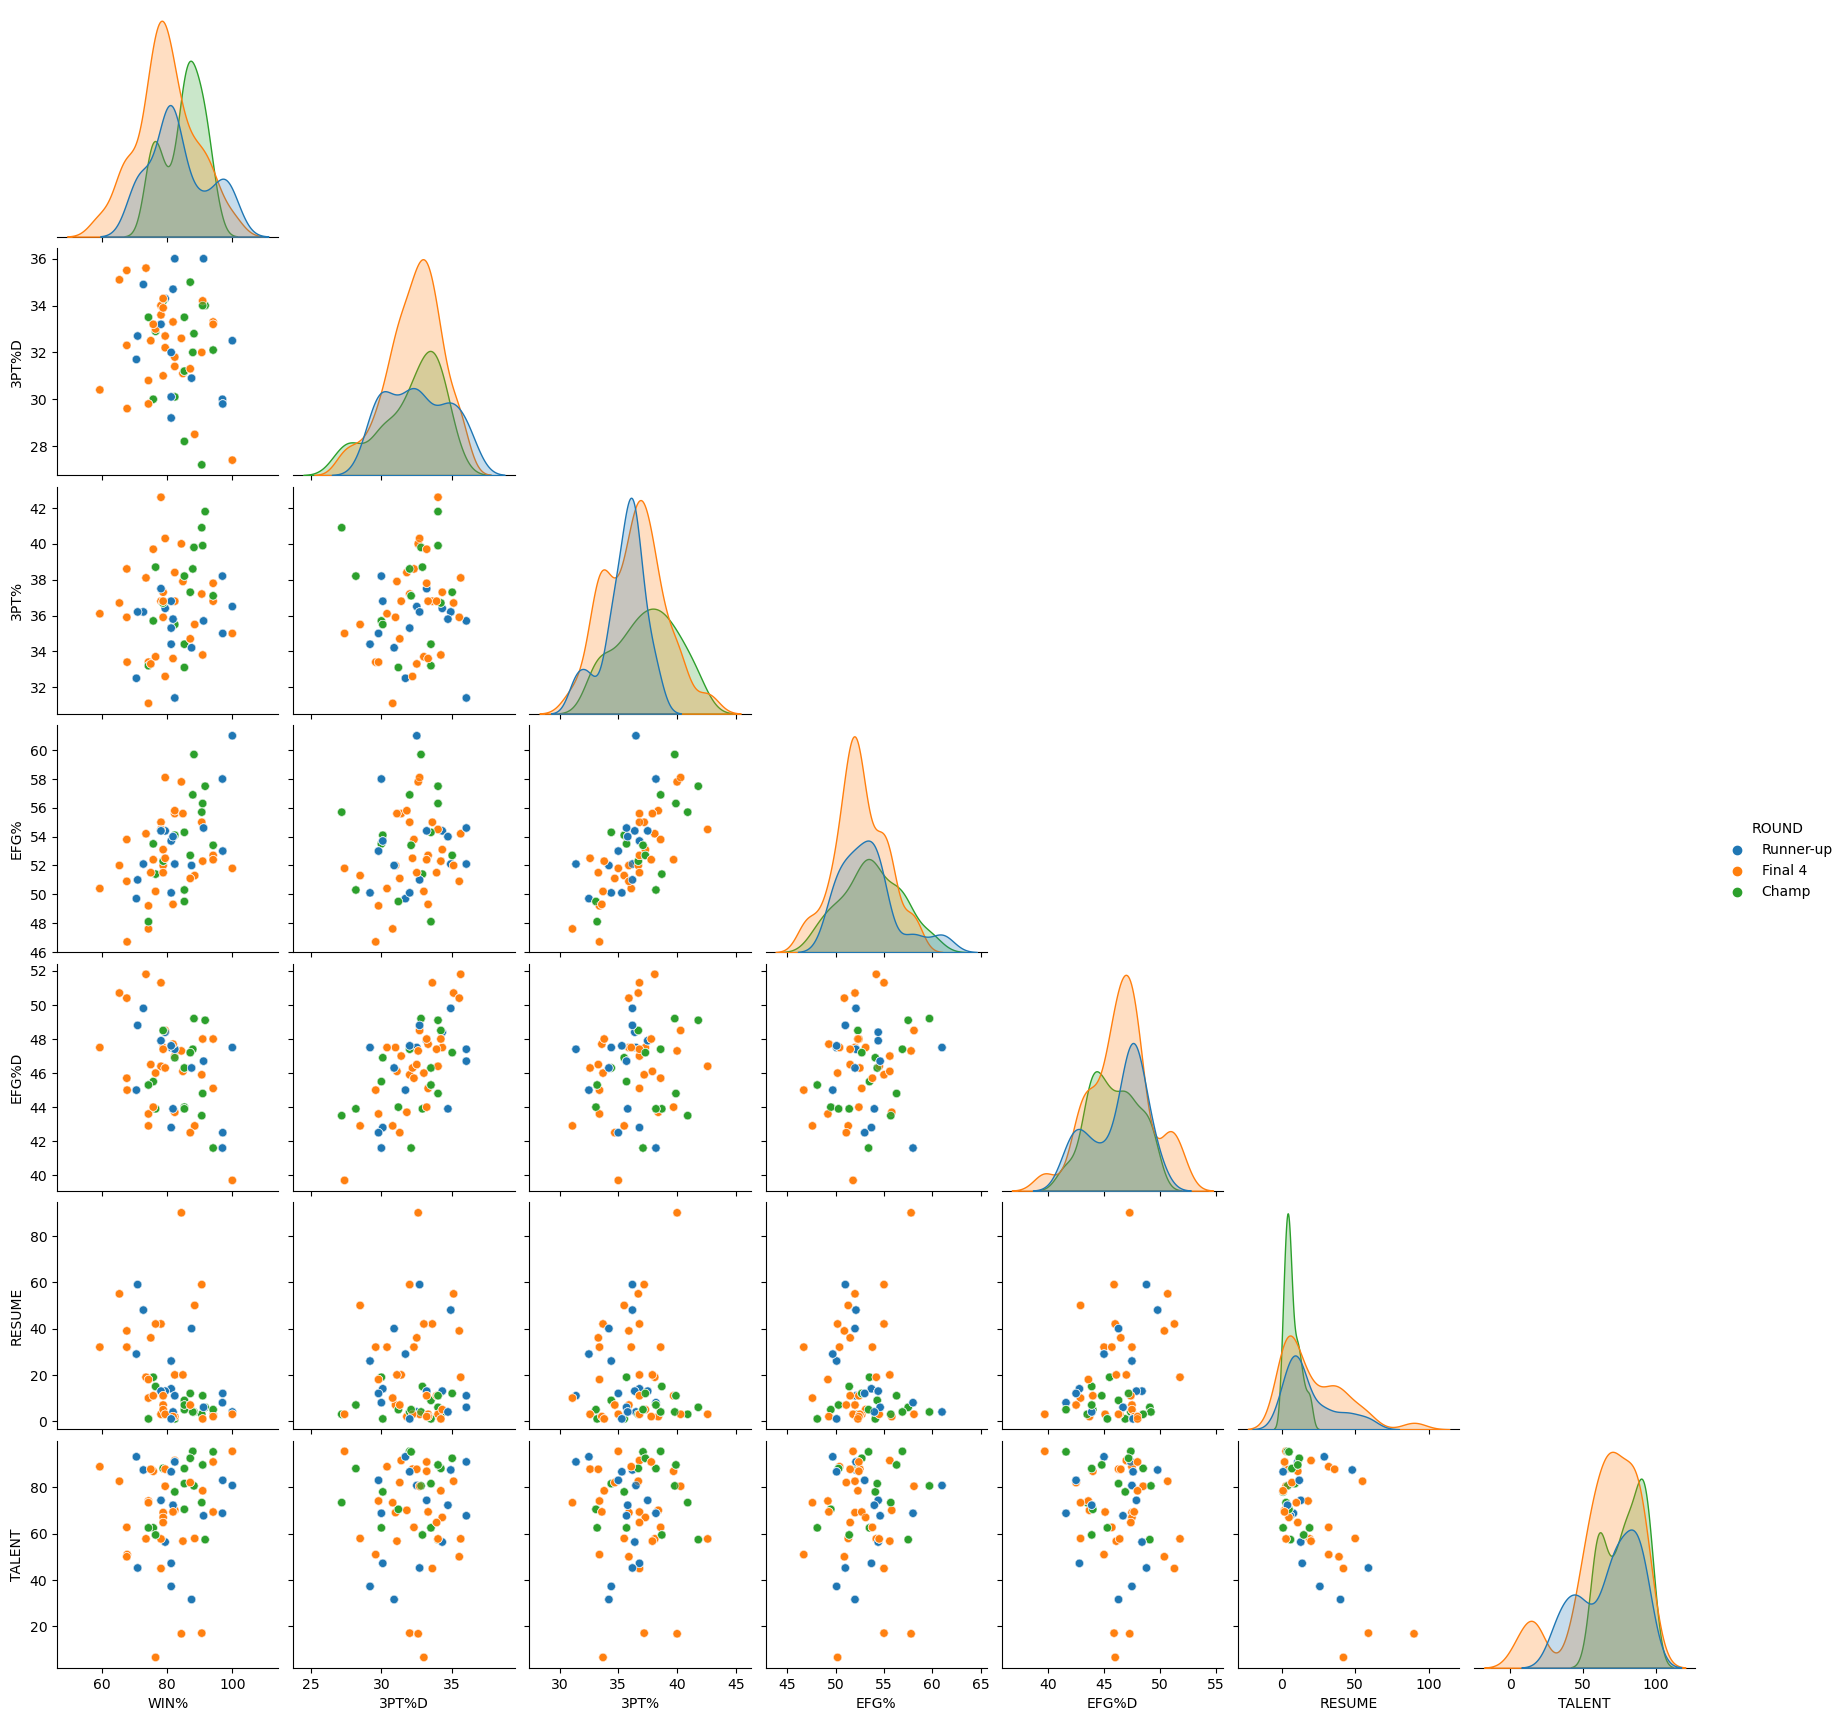

In [11]:
import seaborn as sns
pairplot_data = ['TEAM', 'ROUND', 'WIN%', '3PT%D', '3PT%', 'EFG%', 'EFG%D', 'RESUME', 'TALENT']
data = df[pairplot_data]
data['ROUND'] = data['ROUND'].replace({64:'Not Final 4', 32 : 'Not Final 4', 16 : 'Not Final 4', 8 : 'Not Final 4',
                                      4: 'Final 4', 2: 'Runner-up', 1 : 'Champ'})
data = data[data['ROUND'] != 'Not Final 4']
sns.pairplot(data, hue='ROUND', plot_kws={'alpha':0.6}, corner=True)

C:\Users\josep\AppData\Local\Temp\ipykernel_13964\440715134.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['ROUND'] = data['ROUND'].replace({64:'Not Final 4', 32 : 'Not Final 4', 16 : 'Not Final 4', 8 : 'Not Final 4',


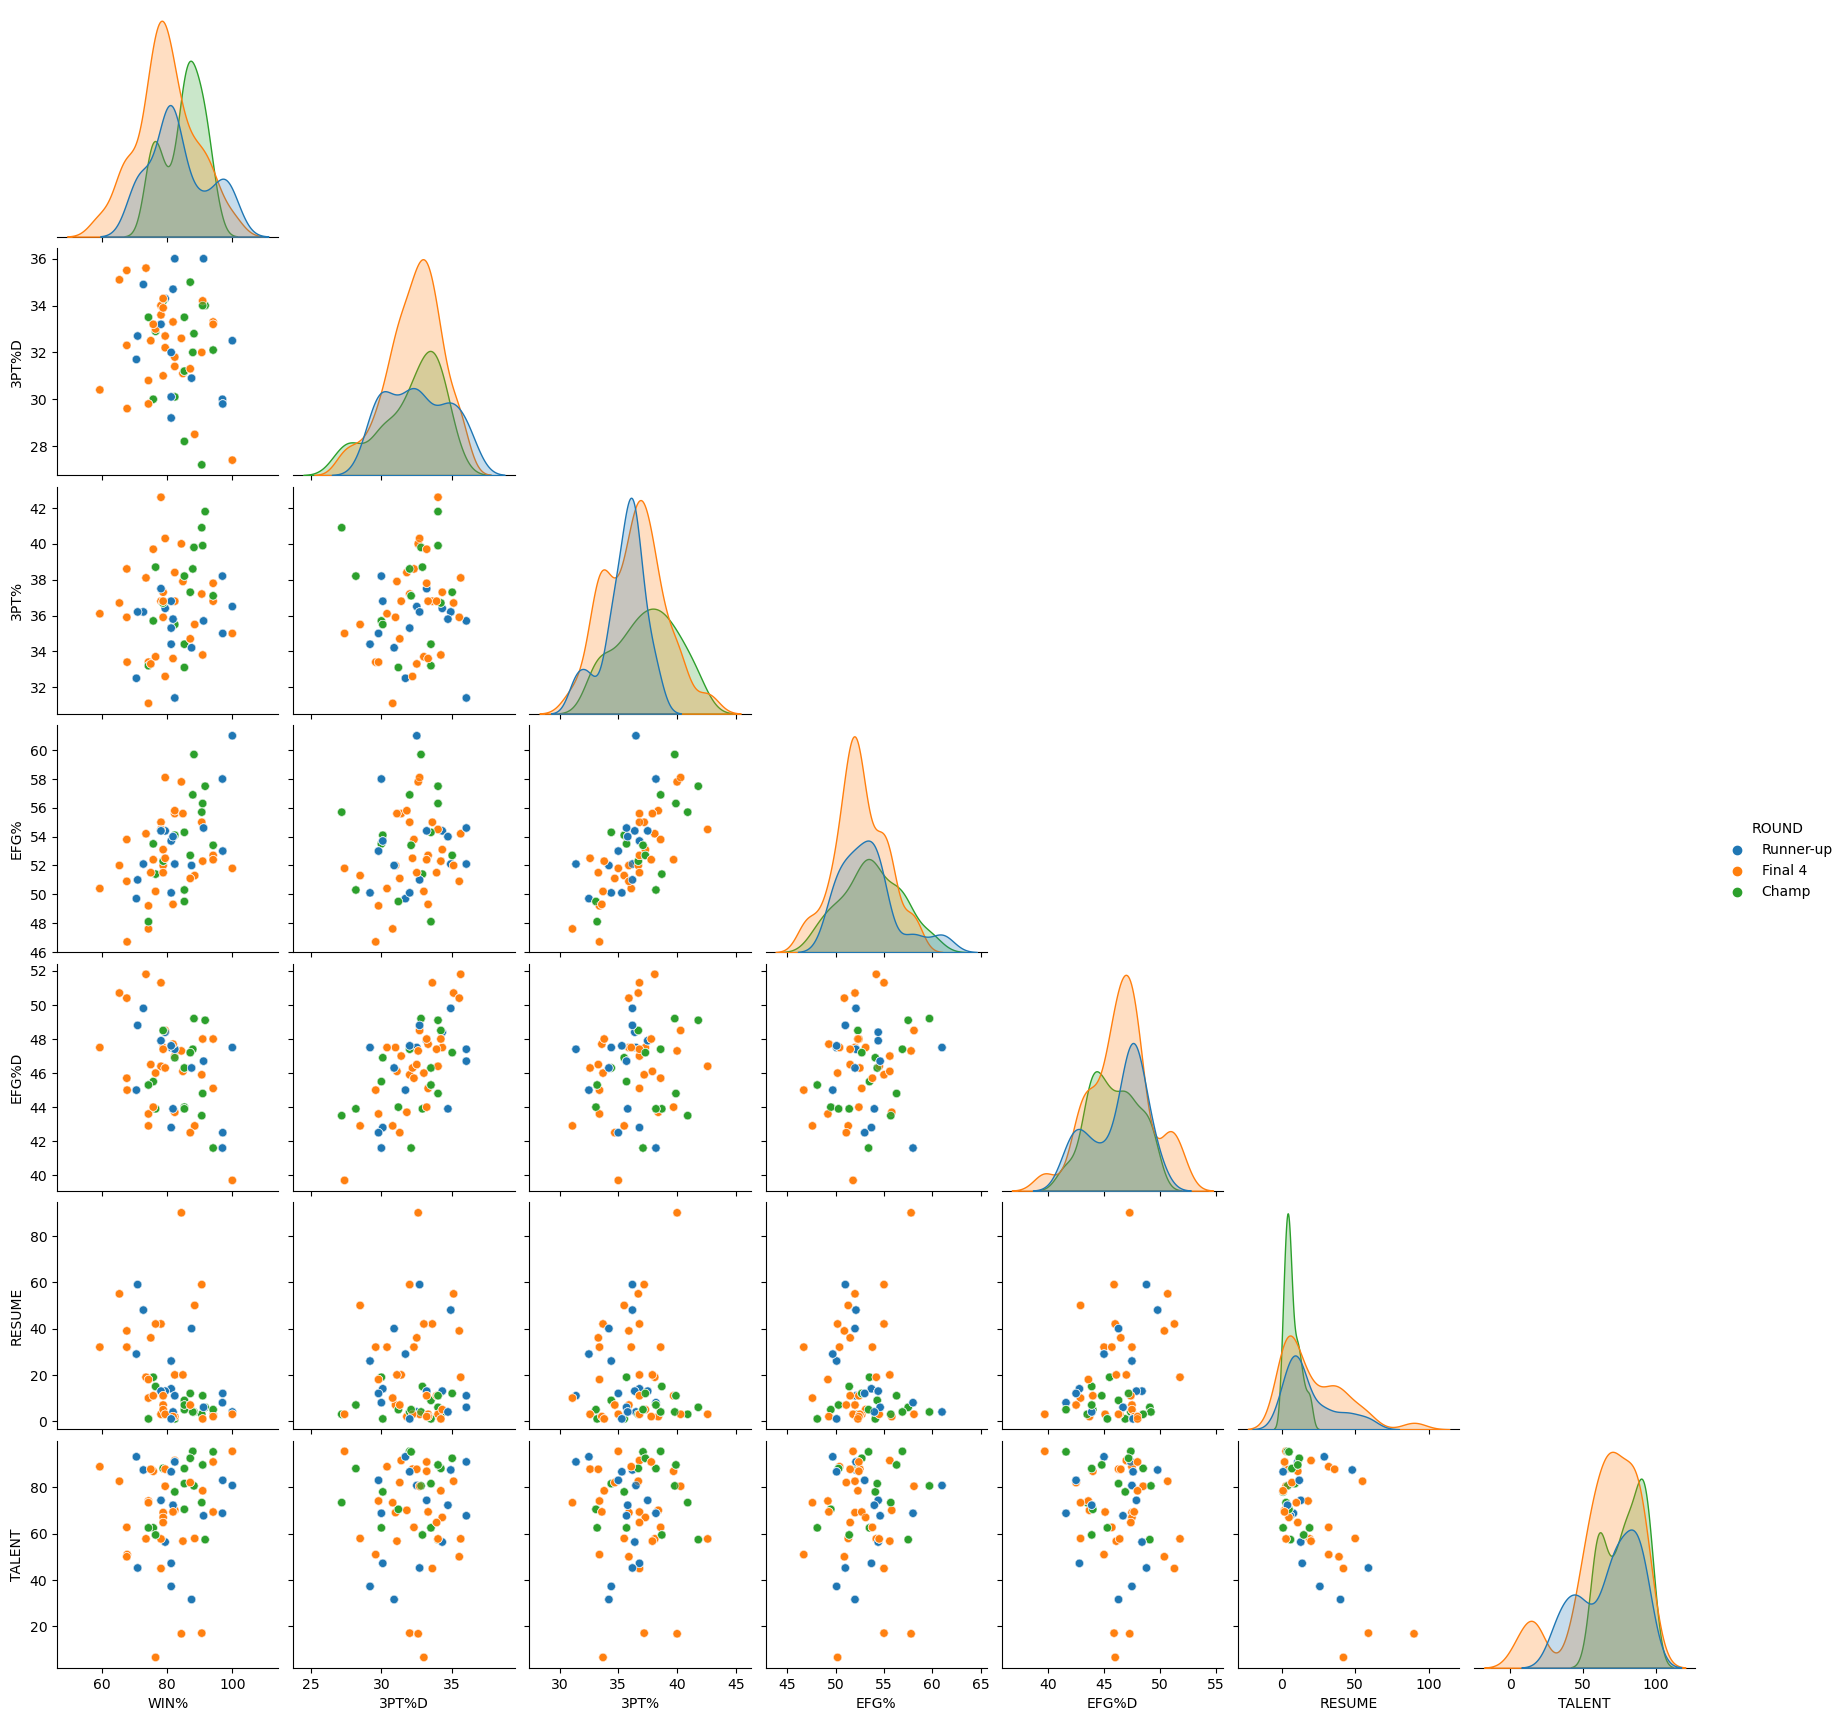

In [12]:
import seaborn as sns
pairplot_data = ['TEAM', 'ROUND', 'TOV%D', 'BARTHAG', 'ELO', 'Q1 W', 'TOV%', 'EFF HGT']
data2 = df[pairplot_data]
data2['ROUND'] = data['ROUND'].replace({64:'Not Final 4', 32 : 'Not Final 4', 16 : 'Not Final 4', 8 : 'Not Final 4',
                                      4: 'Final 4', 2: 'Runner-up', 1 : 'Champ'})
data = data[data['ROUND'] != 'Not Final 4']
sns.pairplot(data, hue='ROUND', plot_kws={'alpha':0.6}, corner=True)

#### Sorry future me, but it's your job to analyze these graphs, I've spent enough time staring at graphs for the day. I will work on a correlation heat map for you to look at next!

In [13]:
features = ['ROUND', 'EXP', 'FT%', 'ELITE SOS', 'KADJ T', 'KADJ O', 'KADJ D', 'KADJ EM', 'PPPD', 'PPPO', 
            'AST%', 'WIN%', 'TOV%', '3PT%D', 'EFG%', 'EFG%D', 'TOV%D', '3PT%', 'BARTHAG', 'ELO', 'Q1 W',
           'EFF HGT', 'TALENT', 'RESUME']
df2 = df[features]

<Axes: >

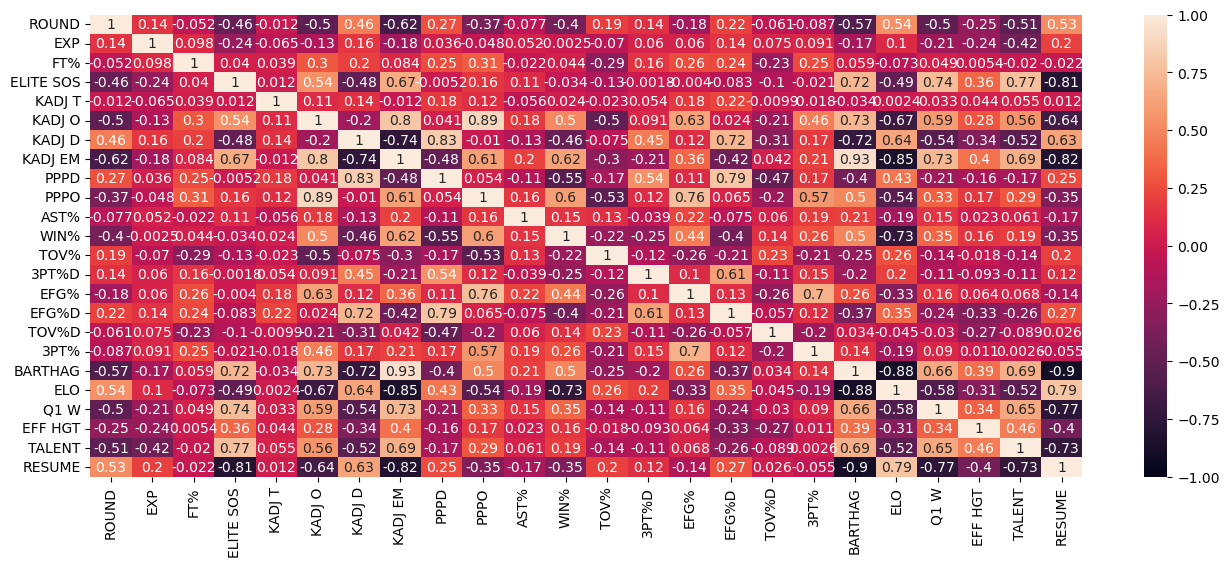

In [14]:
plt.figure(figsize=(16,6))
sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True)


<Axes: title={'center': 'Features Correlating with Round'}>

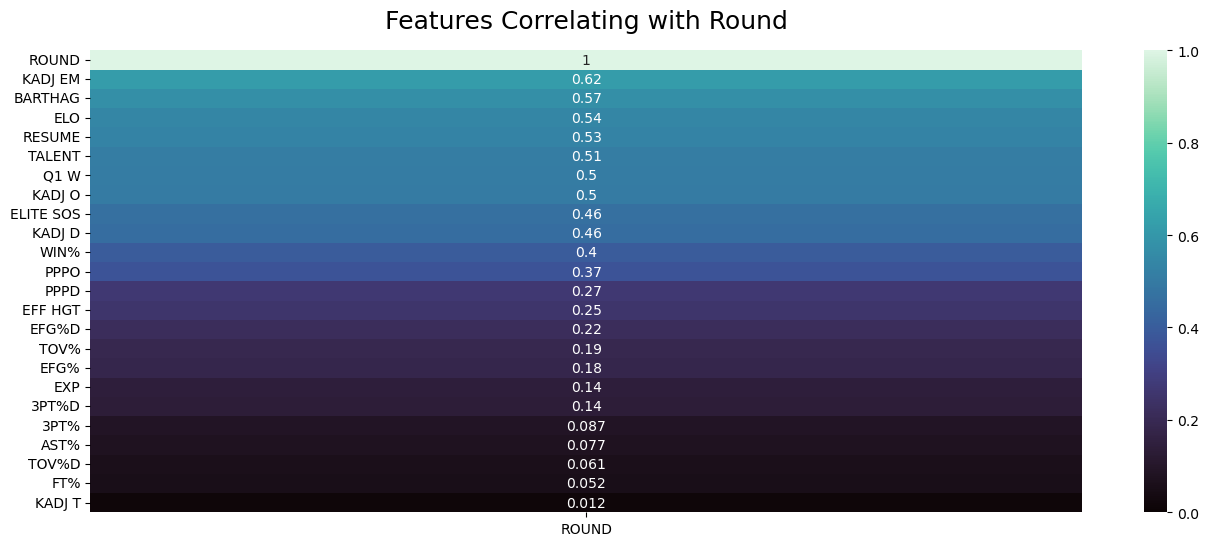

In [15]:
import seaborn as sns
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(abs(df2.corr())[['ROUND']].sort_values(by='ROUND', ascending=False), vmin=0,vmax=1,
                      annot=True, cmap='mako')
heatmap.set_title('Features Correlating with Round', fontdict={'fontsize':18}, pad=16);
heatmap

### Combining rows within dataframe, so that the data is more accessible to Machine Learning algorithms. 
#### Pretty much just puts each matchup on two seperate lines, where one time a team will be Team A and the team they are playing will be Team B. After that is done, then on a seperate line the team that was Team A will become Team B and vice versa.

matchup_df = CombineTeamColumns(df)

matchup_df.head()

#### Create a train-test split. The test split will be 2022, 2023 and 2017, while the train will be 2008-2021 (excluding 2020 & 2017)

Creation of test set

In [17]:
years = [2017, 2022, 2023]

test_set_years = df['YEAR'].isin(years)

test_set = df[test_set_years]
test_set.to_csv('test.csv')

Ceation of training set

In [9]:
years = [2008,2009,2010,2011,2012,2013,2014,
        2015,2016,2018,2019,2021]

train_set_years = df['YEAR'].isin(years)

train_set = df[train_set_years]
train_set.to_csv('train.csv')

# Now that the data has been explored, it is time to begin preparing the data to better expose machine learning algorithms 

In [19]:
features = ['EXP', 'FT%', 'ELITE SOS', 'KADJ T', 'KADJ O', 'KADJ D', 'KADJ EM', 'PPPD', 'PPPO', 
            'AST%', 'WIN%', 'TOV%', '3PT%D', 'EFG%', 'EFG%D', 'TOV%D', '3PT%', 'BARTHAG', 'ELO', 
            'Q1 W', 'RESUME', 'EFF HGT', 'TALENT']
X = train_set[features]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1510 entries, 252 to 1887
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   EXP        1510 non-null   float64
 1   FT%        1510 non-null   float64
 2   ELITE SOS  1510 non-null   float64
 3   KADJ T     1510 non-null   float64
 4   KADJ O     1510 non-null   float64
 5   KADJ D     1510 non-null   float64
 6   KADJ EM    1510 non-null   float64
 7   PPPD       1510 non-null   float64
 8   PPPO       1510 non-null   float64
 9   AST%       1510 non-null   float64
 10  WIN%       1510 non-null   float64
 11  TOV%       1510 non-null   float64
 12  3PT%D      1510 non-null   float64
 13  EFG%       1510 non-null   float64
 14  EFG%D      1510 non-null   float64
 15  TOV%D      1510 non-null   float64
 16  3PT%       1510 non-null   float64
 17  BARTHAG    1510 non-null   float64
 18  ELO        1510 non-null   int64  
 19  Q1 W       1510 non-null   int64  
 20  RESUME

In [21]:
from sklearn.preprocessing import StandardScaler

def standardize_columns(df):
    # Standardizing the data
    scaler = StandardScaler()
    df_numerical_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

    return df_numerical_scaled



In [22]:
standardized_X = standardize_columns(X)

In [23]:
from sklearn.decomposition import PCA
import numpy as np

# Fitting PCA to the standardized data
pca = PCA(n_components= 13)
pca.fit(standardized_X)
X_pca = pca.transform(standardized_X)

# Calculating the cumulative variance explained by the principal components
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Finding the number of components that explain at least 95% of the variance
n_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1

cumulative_variance, n_components_95


(array([0.34765327, 0.51638685, 0.62160538, 0.678143  , 0.72846912,
        0.7764309 , 0.81079033, 0.84340956, 0.87438408, 0.90163371,
        0.92236039, 0.93913145, 0.95364816]),
 13)

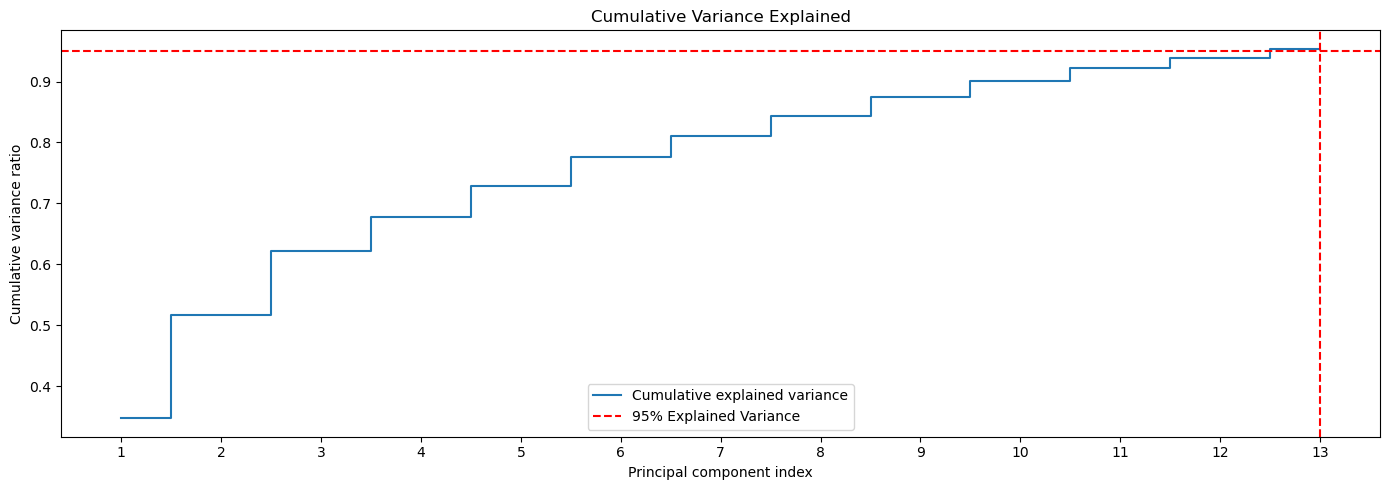

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# Cumulative Variance Plot
plt.subplot(1, 1, 1)
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Cumulative variance ratio')
plt.xlabel('Principal component index')
plt.title('Cumulative Variance Explained')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.axvline(x=n_components_95, color='r', linestyle='--')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [25]:
# The eigenvalues (variance explained by each component)
eigenvalues = pca.explained_variance_

# The proportion of variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_

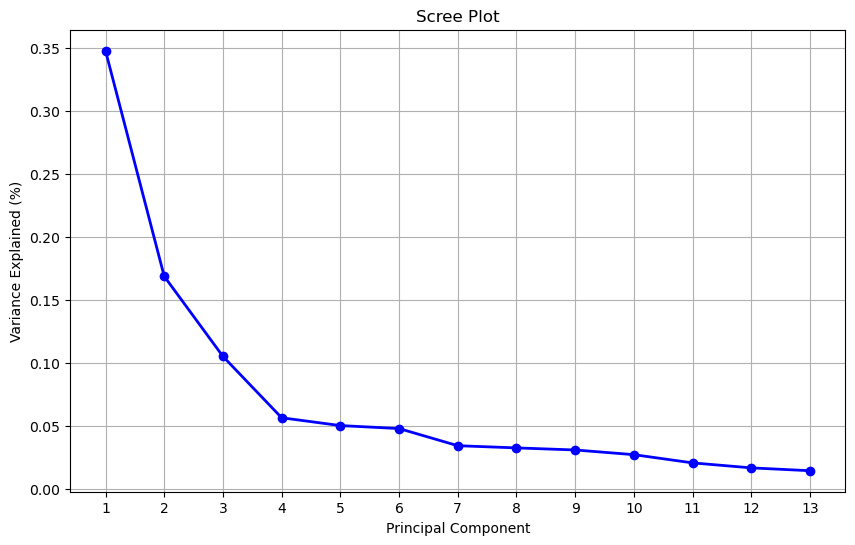

In [26]:
import matplotlib.pyplot as plt

# Number of components
components = range(1, len(explained_variance_ratio) + 1)

# Create the scree plot
plt.figure(figsize=(10, 6))
plt.plot(components, explained_variance_ratio, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained (%)')
plt.xticks(components)
plt.grid(True)

# Show plot
plt.show()


From what this is graph is showing me as well as the Principal Components Anlysis. It would be best if I used 13 features, but the question is which ones? So now, I will analyze my PCA through a correlation heatmap to view the features that are acutally the most important

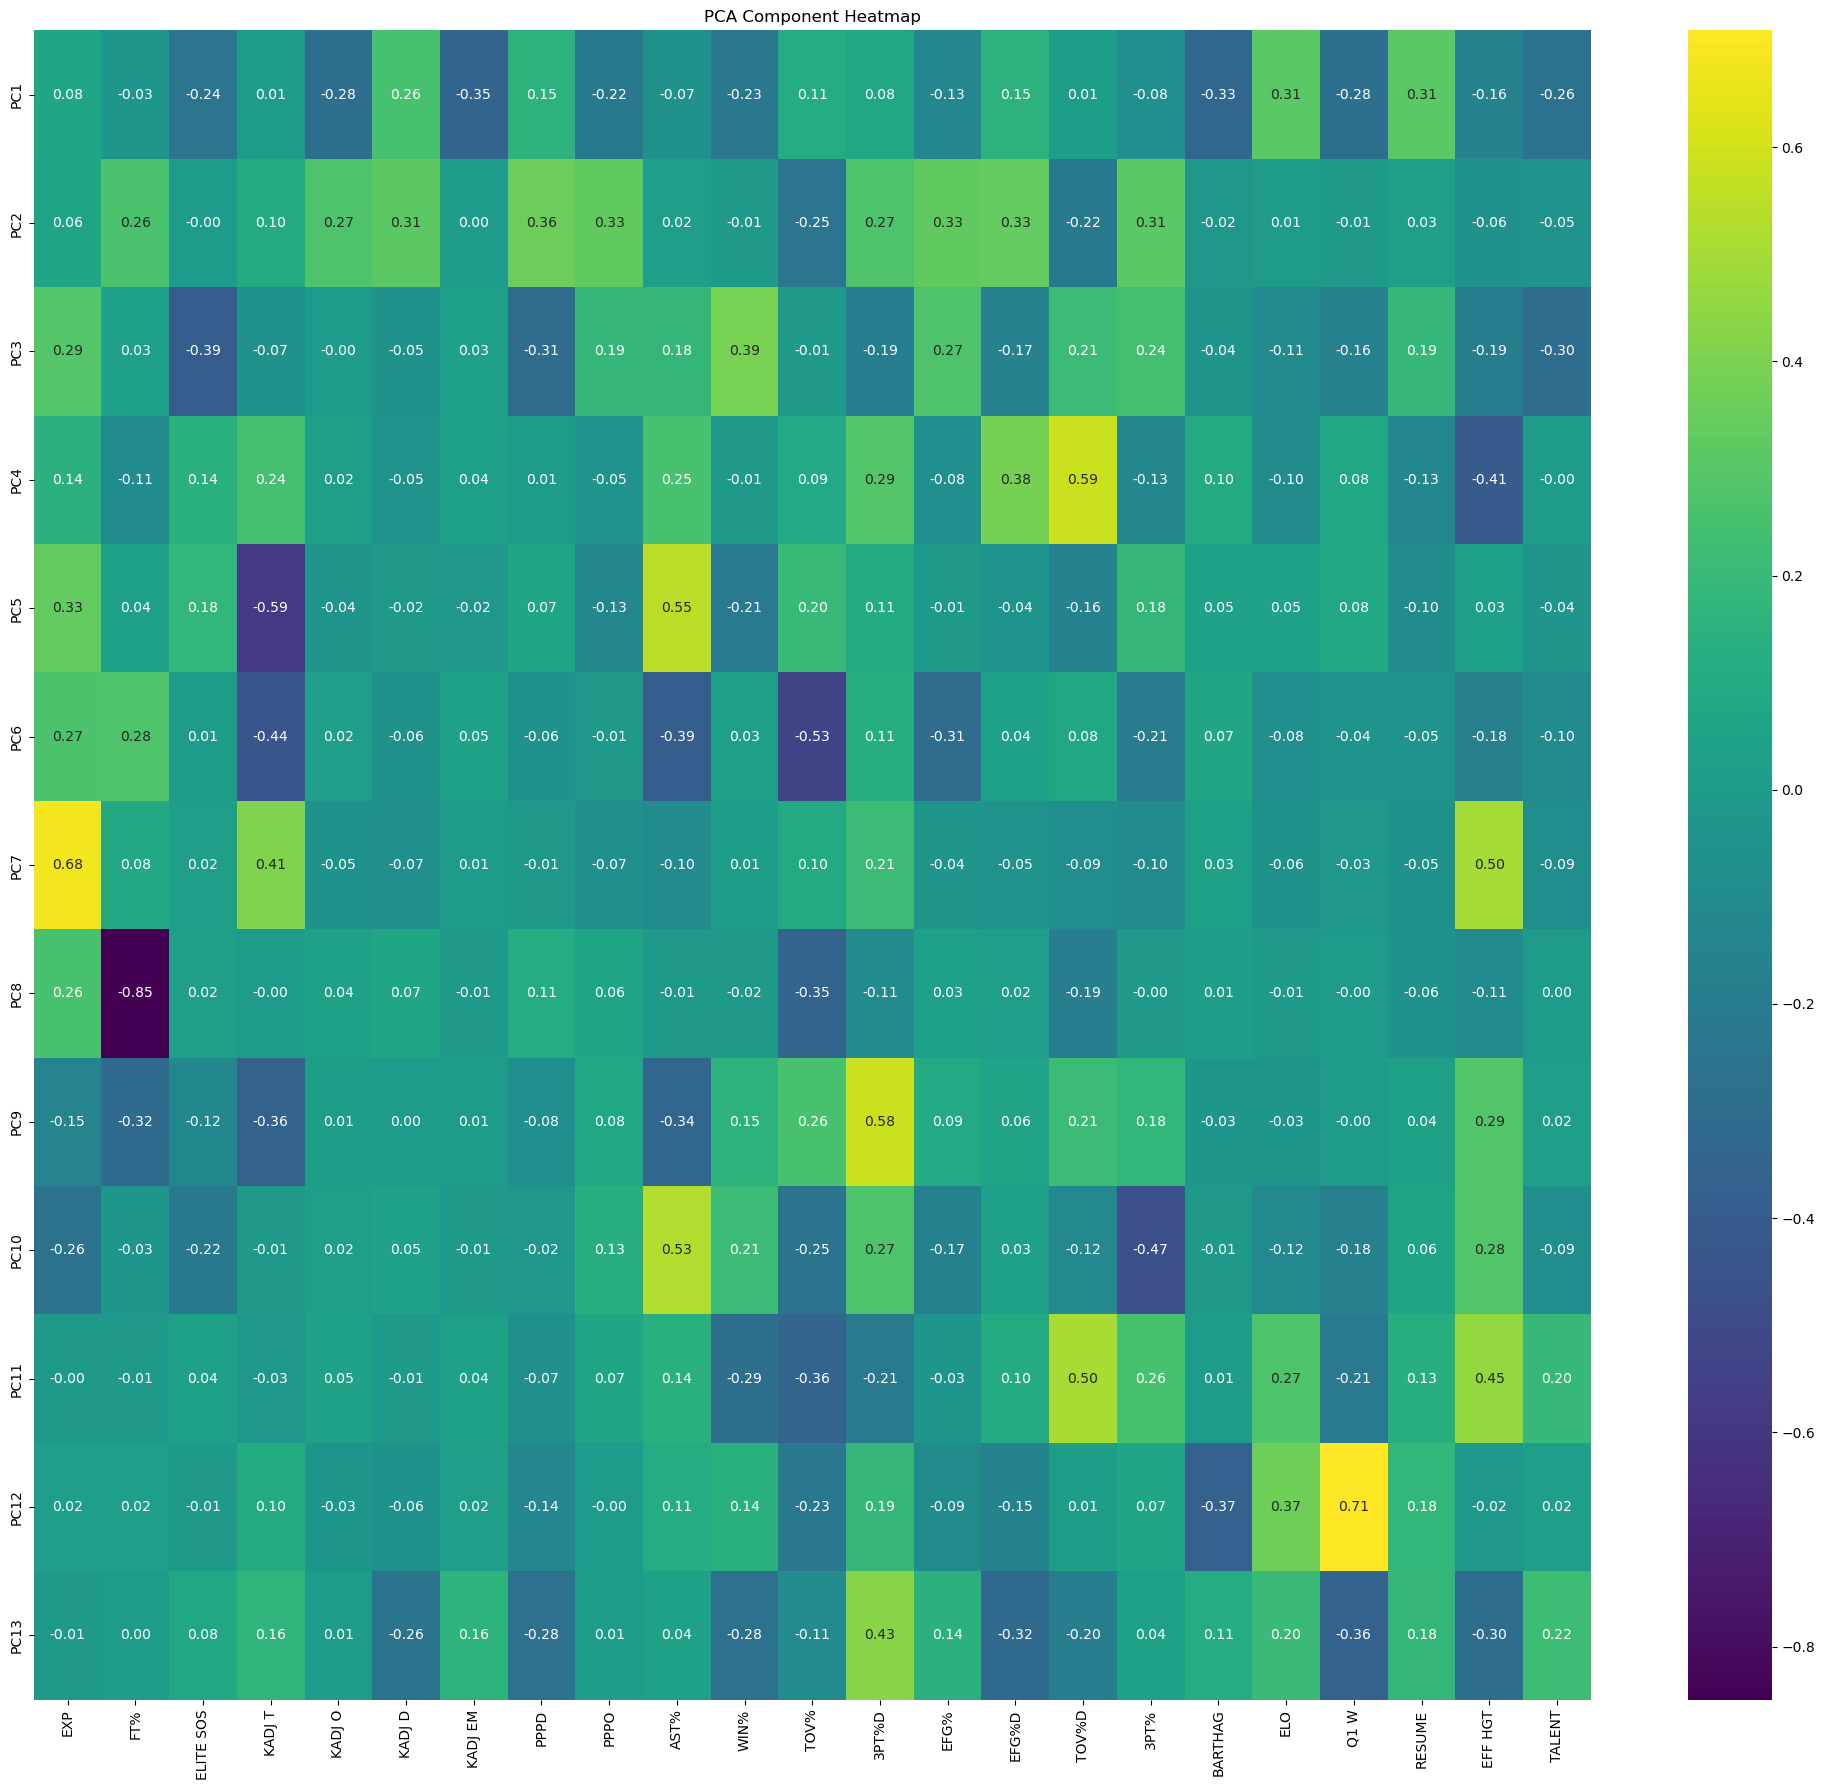

In [27]:
import seaborn as sns

# Coefficients of the original features on all components
coefficients_all = pca.components_

# Creating a heatmap for the coefficients
plt.figure(figsize=(20, 18))
sns.heatmap(coefficients_all, cmap='viridis', annot=True, fmt=".2f",
            yticklabels=["PC" + str(i+1) for i in range(coefficients_all.shape[0])],
            xticklabels=standardized_X.columns)
plt.title('PCA Component Heatmap')
plt.tight_layout()
plt.show()


Am not a fan of having to 

In [28]:
loadings = pca.components_
loading_matrix = pd.DataFrame(loadings, columns=standardized_X.columns, 
                              index=[f'PC{i+1}' for i in range(loadings.shape[0])])

In [29]:
def top_features_for_pc(loading_matrix, pc, top_n=5):
    sorted_loadings = loading_matrix.loc[pc].sort_values(ascending=False)
    top_positive_features = sorted_loadings.head(top_n)
    top_negative_features = sorted_loadings.tail(top_n)
    return top_positive_features, top_negative_features

# Example for the first principal component (PC1)
for i in range(1,14):
    top_pos_features, top_neg_features = top_features_for_pc(loading_matrix, f'PC{i}', top_n=5)

    # Print results
    print(f"Top Positive Features for PC{i}:\n", top_pos_features)
    print(f"Top Negative Features for PC{i}:\n", top_neg_features)


Top Positive Features for PC1:
 ELO       0.312732
RESUME    0.308954
KADJ D    0.255174
PPPD      0.153965
EFG%D     0.149973
Name: PC1, dtype: float64
Top Negative Features for PC1:
 TALENT    -0.261289
Q1 W      -0.279487
KADJ O    -0.283872
BARTHAG   -0.332752
KADJ EM   -0.346395
Name: PC1, dtype: float64
Top Positive Features for PC2:
 PPPD      0.357463
EFG%D     0.334865
PPPO      0.328670
EFG%      0.325885
KADJ D    0.313563
Name: PC2, dtype: float64
Top Negative Features for PC2:
 BARTHAG   -0.022314
TALENT    -0.048962
EFF HGT   -0.064479
TOV%D     -0.220111
TOV%      -0.245259
Name: PC2, dtype: float64
Top Positive Features for PC3:
 WIN%     0.389659
EXP      0.292430
EFG%     0.271649
3PT%     0.242437
TOV%D    0.210025
Name: PC3, dtype: float64
Top Negative Features for PC3:
 3PT%D       -0.186640
EFF HGT     -0.187550
TALENT      -0.300997
PPPD        -0.305563
ELITE SOS   -0.390253
Name: PC3, dtype: float64
Top Positive Features for PC4:
 TOV%D     0.585472
EFG%D     0

Going to mess around with some K-means clustering:
# Although there is a K-means clustering algorithm implemented. Do not use until you try combining features using what you found within the PCA analysis.

In [ ]:
from sklearn.cluster import KMeans

inertia = []
range_values = range(1, 10)

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


Infers that around 6 is the best number of clusters



# Choose the number of clusters , k=3, sqrt(n/2)->sqrt(23/2)->3-4
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

import matplotlib.pyplot as plt
import numpy as np

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.7)
plt.title('Clusters based on PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()


# Any code below that relates to A_ and B_ use later, no reason to add extra dimensions ATM
## Going to implement an example decision tree to test model accuracy before and after combination features

In [30]:
def CombineTeamColumns(df):
    # Split the DataFrame into two: one for Team A (even-indexed rows) and one for Team B (odd-indexed rows)
    team_a_df = df.iloc[::2].reset_index(drop=True)
    team_b_df = df.iloc[1::2].reset_index(drop=True)

    # Rename the columns to reflect Team A and Team B
    team_a_df.columns = ['A_' + col if col not in ['YEAR', 'ROUND'] else col for col in team_a_df.columns]
    team_b_df.columns = ['B_' + col if col not in ['YEAR', 'ROUND'] else col for col in team_b_df.columns]

    # Merge the two DataFrames on 'YEAR' and 'ROUND'
    merged_df = pd.concat([team_a_df, team_b_df.drop(['YEAR', 'ROUND'], axis=1)], axis=1)

    # For demonstration, let's calculate the difference in SCORE as an example of calculating differences
    # You can apply this to other metrics as needed
    merged_df['SCORE_DIFF'] = merged_df['A_SCORE'] - merged_df['B_SCORE']

    
    '''
    Decide if you want to double up the data frame or not.
    If so uncomment out this code
    '''   
    # Duplicate the merged DataFrame and adjust for Team B's perspective
    swapped_df = merged_df.copy()

    # Swap the team names, scores, and other metrics if needed
    for col in swapped_df.columns:
        if col.startswith('A_'):
            swapped_df.rename(columns={col: col.replace('A_', 'temp_')}, inplace=True)
        elif col.startswith('B_'):
            swapped_df.rename(columns={col: col.replace('B_', 'A_')}, inplace=True)

    # Now rename the temp_ to B_
    for col in swapped_df.columns:
        if col.startswith('temp_'):
            swapped_df.rename(columns={col: col.replace('temp_', 'B_')}, inplace=True)

    # Invert the difference columns to reflect the perspective swap
    # Assuming other metrics differences are to be calculated, they should follow the same logic
    swapped_df['SCORE_DIFF'] = -swapped_df['SCORE_DIFF']

    # Concatenate the original and swapped DataFrames
    doubled_df = pd.concat([merged_df, swapped_df], axis=0).reset_index(drop=True)
    return doubled_df
    
    #return merged_df # Uncomment if you decide that you don't want to continue with the doubled data


In [31]:
test_df = CombineTeamColumns(train_set)

In [ ]:
test_df.to_csv('train set.csv')

In [86]:
'''
features = ['A_EXP', 'A_FT%', 'A_ELITE SOS', 'A_KADJ T', 'A_KADJ O', 'A_KADJ D', 'A_KADJ EM', 'A_PPPD', 'A_PPPO', 
            'A_AST%', 'A_WIN%', 'A_TOV%', 'A_3PT%D', 'A_EFG%', 'A_EFG%D', 'A_TOV%D', 'A_3PT%', 'A_BARTHAG', 'A_ELO', 
            'A_Q1 W', 'A_EFF HGT', 'A_TALENT', 'A_RESUME', 'B_EXP', 'B_FT%', 'B_ELITE SOS', 'B_KADJ T', 'B_KADJ O', 
            'B_KADJ D', 'B_KADJ EM', 'B_PPPD', 'B_PPPO', 'B_AST%', 'B_WIN%', 'B_TOV%', 'B_3PT%D', 'B_EFG%', 'B_EFG%D',
            'B_TOV%D', 'B_3PT%', 'B_BARTHAG', 'B_ELO', 'B_Q1 W', 'B_EFF HGT', 'B_TALENT', 'B_RESUME']
   '''         
features = ['A_KADJ EM', 'B_KADJ EM', 'B_KADJ O', 'A_KADJ O']
X = test_df[features]
y = test_df['SCORE_DIFF']

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred_dt = dt_regressor.predict(X_test)

# Evaluating the model
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(dt_mse)

dt_rmse

17.32127276115197

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import accuracy_score

y_clf = (test_df['SCORE_DIFF'] > 0).astype(int)

# Splitting the dataset into training and testing sets
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_clf, y_train_clf)

# Predicting on the test set with the decision tree classifier
y_pred_dt_clf = dt_classifier.predict(X_test_clf)

# Calculating accuracy for the decision tree classifier
accuracy_class_clf = accuracy_score(y_test_clf, y_pred_dt_clf)

accuracy_class_clf

0.6026490066225165

In [89]:
from sklearn.neural_network import MLPRegressor

# Normalizing the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and training a simple neural network model
nn_regressor = MLPRegressor(hidden_layer_sizes=(100,), random_state=42, max_iter=5000)
nn_regressor.fit(X_train_scaled, y_train)

# Predicting on the test set with the neural network model
y_pred_nn = nn_regressor.predict(X_test_scaled)

# Evaluating the neural network model
nn_mse = mean_squared_error(y_test, y_pred_nn)
nn_rmse = np.sqrt(nn_mse)

nn_rmse

11.839026921347362

In [90]:


# Converting continuous predictions into binary outcomes (win/loss)
y_test_binary = (y_test > 0).astype(int)  # Actual outcomes: 1 for win, 0 for loss
y_pred_dt_binary = (y_pred_dt > 0).astype(int)  # Predicted outcomes from decision tree
y_pred_nn_binary = (y_pred_nn > 0).astype(int)  # Predicted outcomes from neural network

# Calculating accuracy for both models
dt_accuracy = accuracy_score(y_test_binary, y_pred_dt_binary)
nn_accuracy = accuracy_score(y_test_binary, y_pred_nn_binary)

round(dt_accuracy,4), round(nn_accuracy,4), round(accuracy_class_clf, 4)

(0.6159, 0.7053, 0.6026)

#### Start off model accuracy based on base features, will now combine features based on PCA, to see if these algorithms will perform better or worse.
### All features : (0.6391, 0.6589, 0.5927)
### Just KADJ EM: (0.5993, 0.7119, 0.6358)
##### Will now analyze feature importance

In [78]:
# Extracting feature importance from the decision tree model
feature_importances_dt = pd.Series(dt_regressor.feature_importances_, index=X.columns)

# Sorting features by importance
sorted_feature_importances_dt = feature_importances_dt.sort_values(ascending=False)

sorted_feature_importances_dt

A_KADJ EM    0.581498
B_KADJ EM    0.418502
dtype: float64

In [79]:
# Extracting feature importance from the decision tree model
feature_importances_dt = pd.Series(dt_classifier.feature_importances_, index=X.columns)

# Sorting features by importance
sorted_feature_importances_dt = feature_importances_dt.sort_values(ascending=False)

sorted_feature_importances_dt

B_KADJ EM    0.500255
A_KADJ EM    0.499745
dtype: float64